# Marketing medium budget vs Sales dataset
---

##  **Analysis**

In [2]:
import pandas as pd
df=pd.read_csv(r"Advertising Budget and Sales.csv")
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Note that sales data is lesser than tv budget, so probably is a scaled back value. Mind its decimals.

### Question 1. How is the advertisement sales data distributed? What are the summary statistics, such as mean, median, minimum, maximum, and standard deviation?

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df. iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
print("median of ",df. iloc[:,-1:].median())


median of  Sales ($)    12.9
dtype: float64


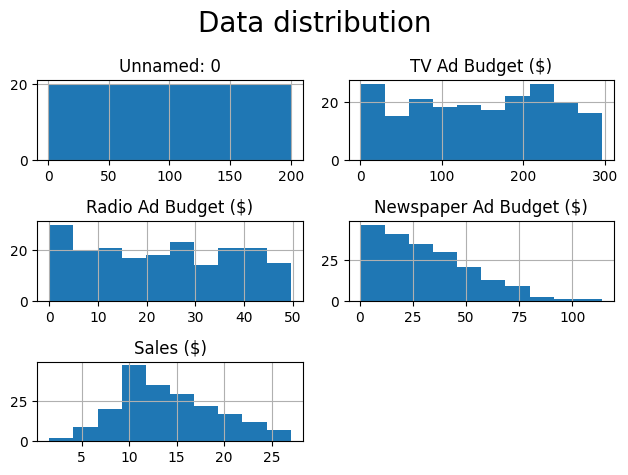

In [18]:
df.hist()
plt.suptitle("Data distribution", fontsize =20 )
plt.tight_layout()

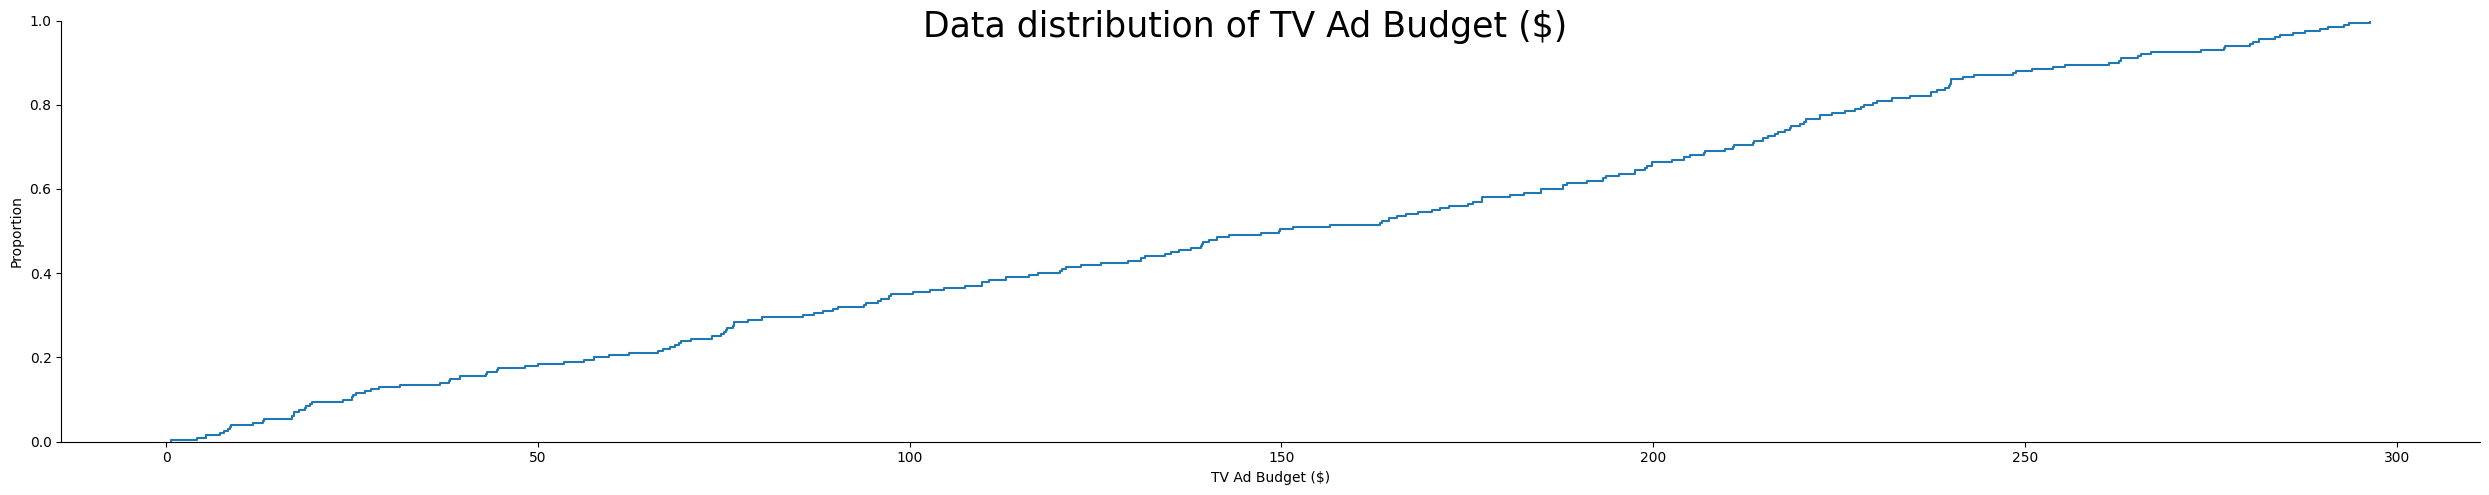

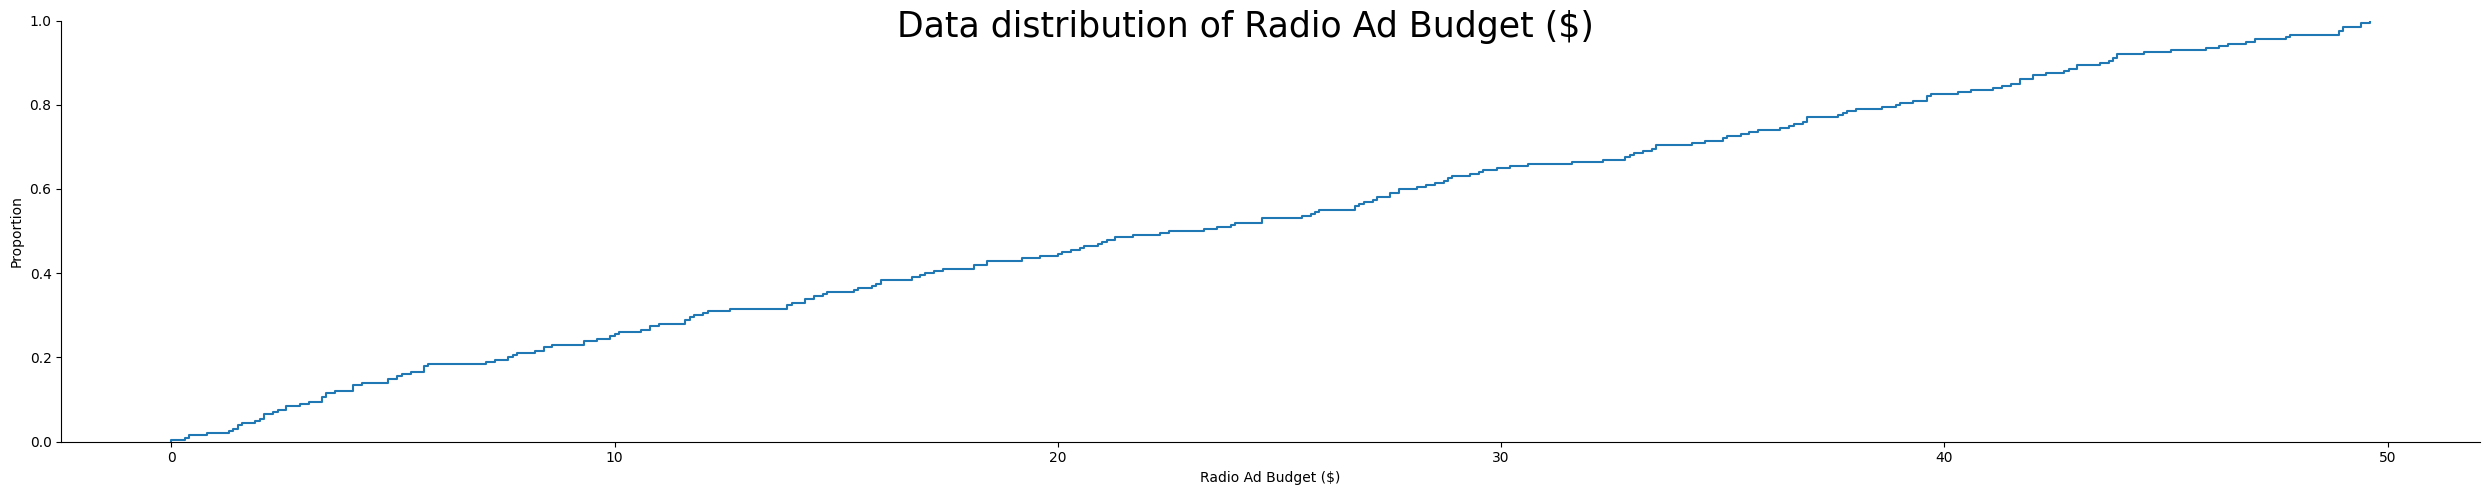

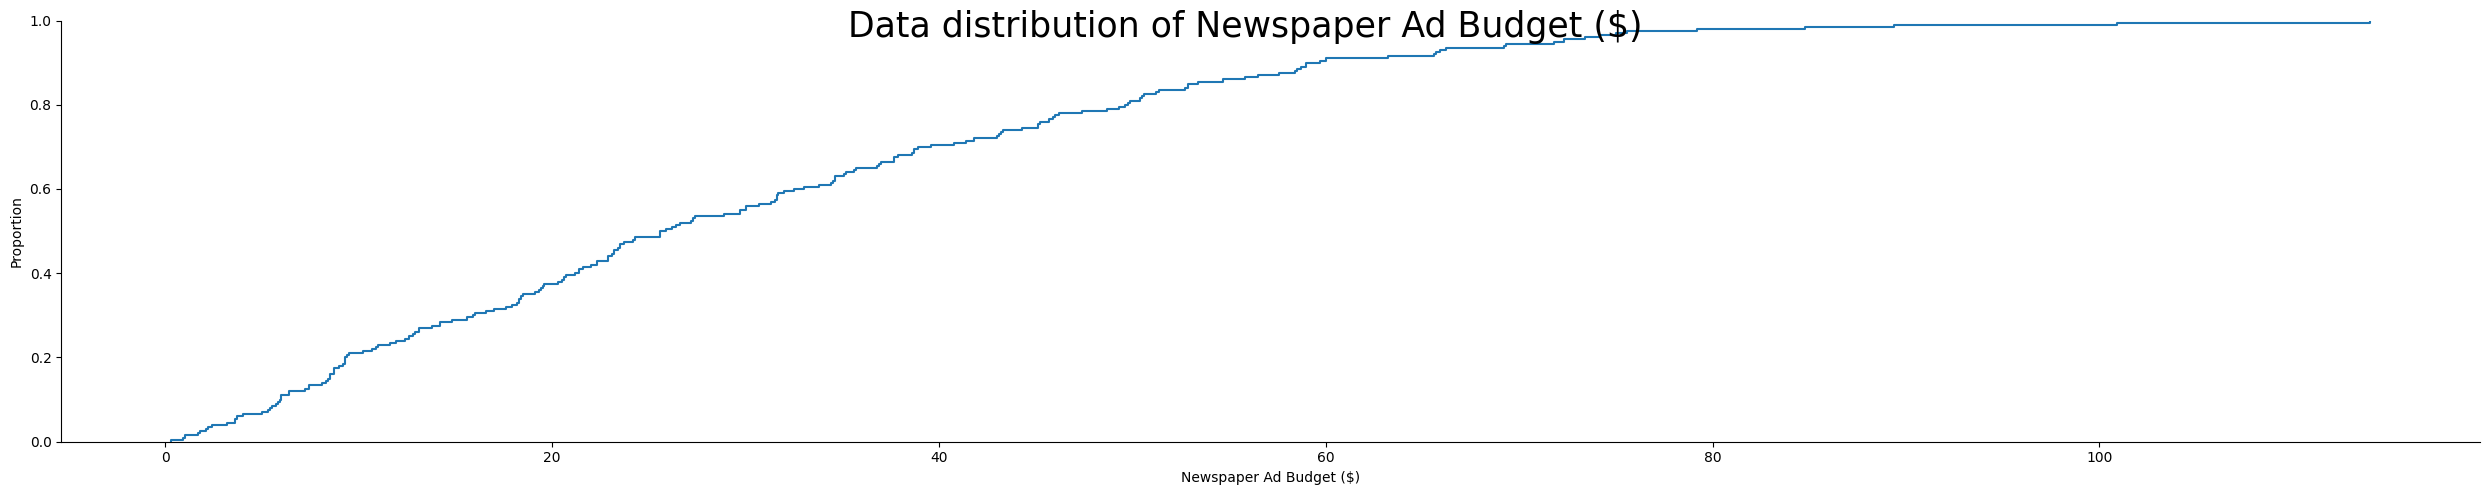

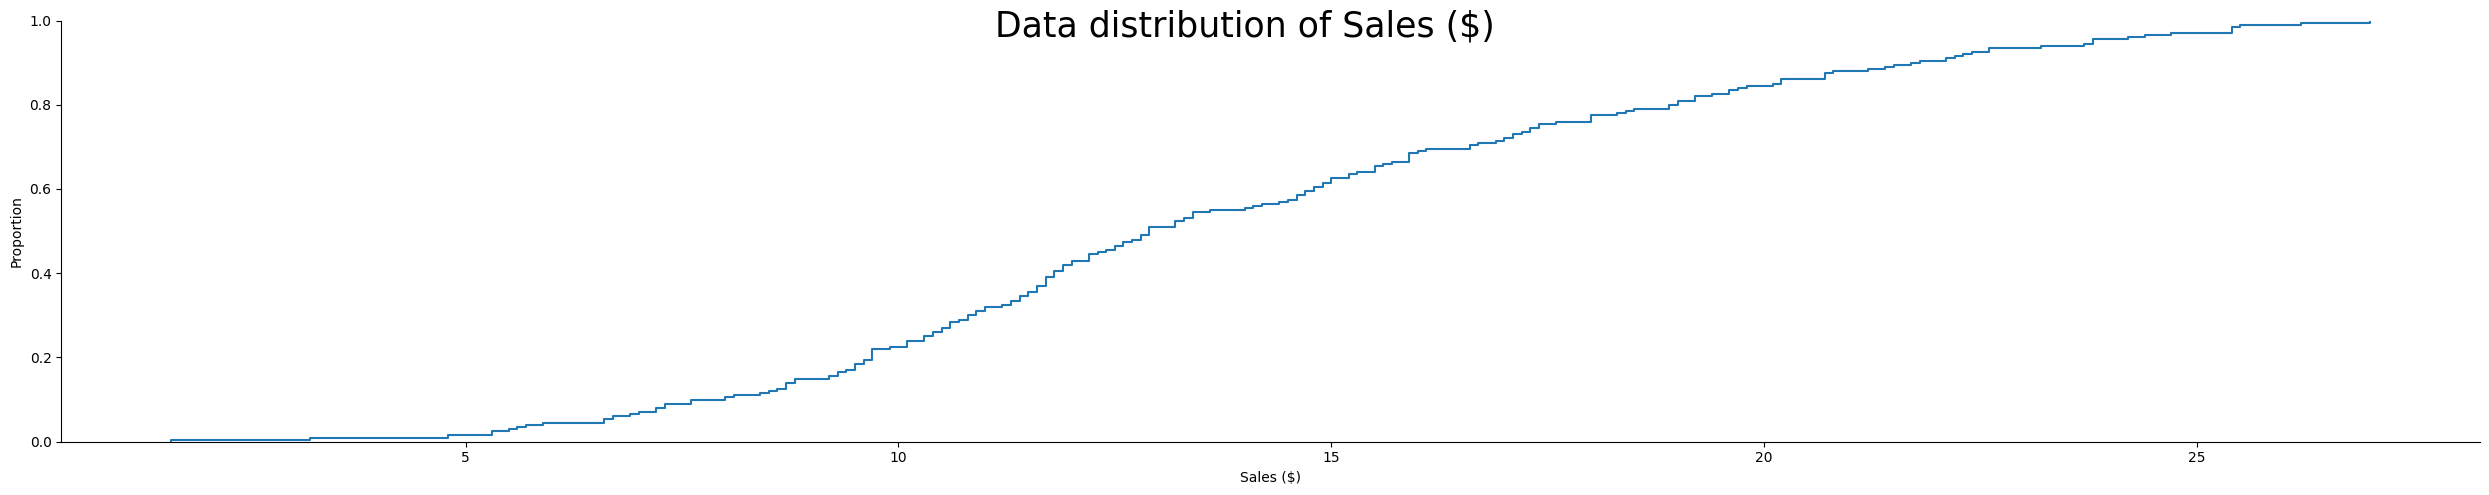

In [26]:

for column in df.iloc[:,1:].columns:
    sns.displot(data=df, x = column,kind = "ecdf",aspect=5,)
    plt.suptitle("Data distribution of {column}".format(column= column), fontsize =25 )
plt.show()

keypoints about data distribution:
1) The newspaper data is highly left skewed(negative exponential distribution), proabably because in newspaper, ads are given for a single day instead of a week/month/year basis, so most of the days it is low, with occassional highs.
2) Sales data distribution follows bell curve with slight left skew(from boxplot below).
3) All the other columns are distributed with similar importance for all the values(as seen on distplot)

### Question 2. Are there any trends or patterns in advertisement sales over time? Can you identify any seasonality or cyclicality in the data?

In [686]:
def seasonal_plot(avg_count):

    figure, axis = plt.subplots(4,
                            sharex=False, 
                            figsize=(15,10)
                        )
    figure.suptitle('plot to find seasonality', fontsize=19)
    
    for i,x in enumerate(df.iloc[:,1:].columns):
        axis[i].plot(df[x].rolling(avg_count).mean())

        axis[i].set_title(x)   
        axis[i].set_xlabel(x)
        axis[i].set_ylabel('values')     

    plt.tight_layout()
    plt.show()

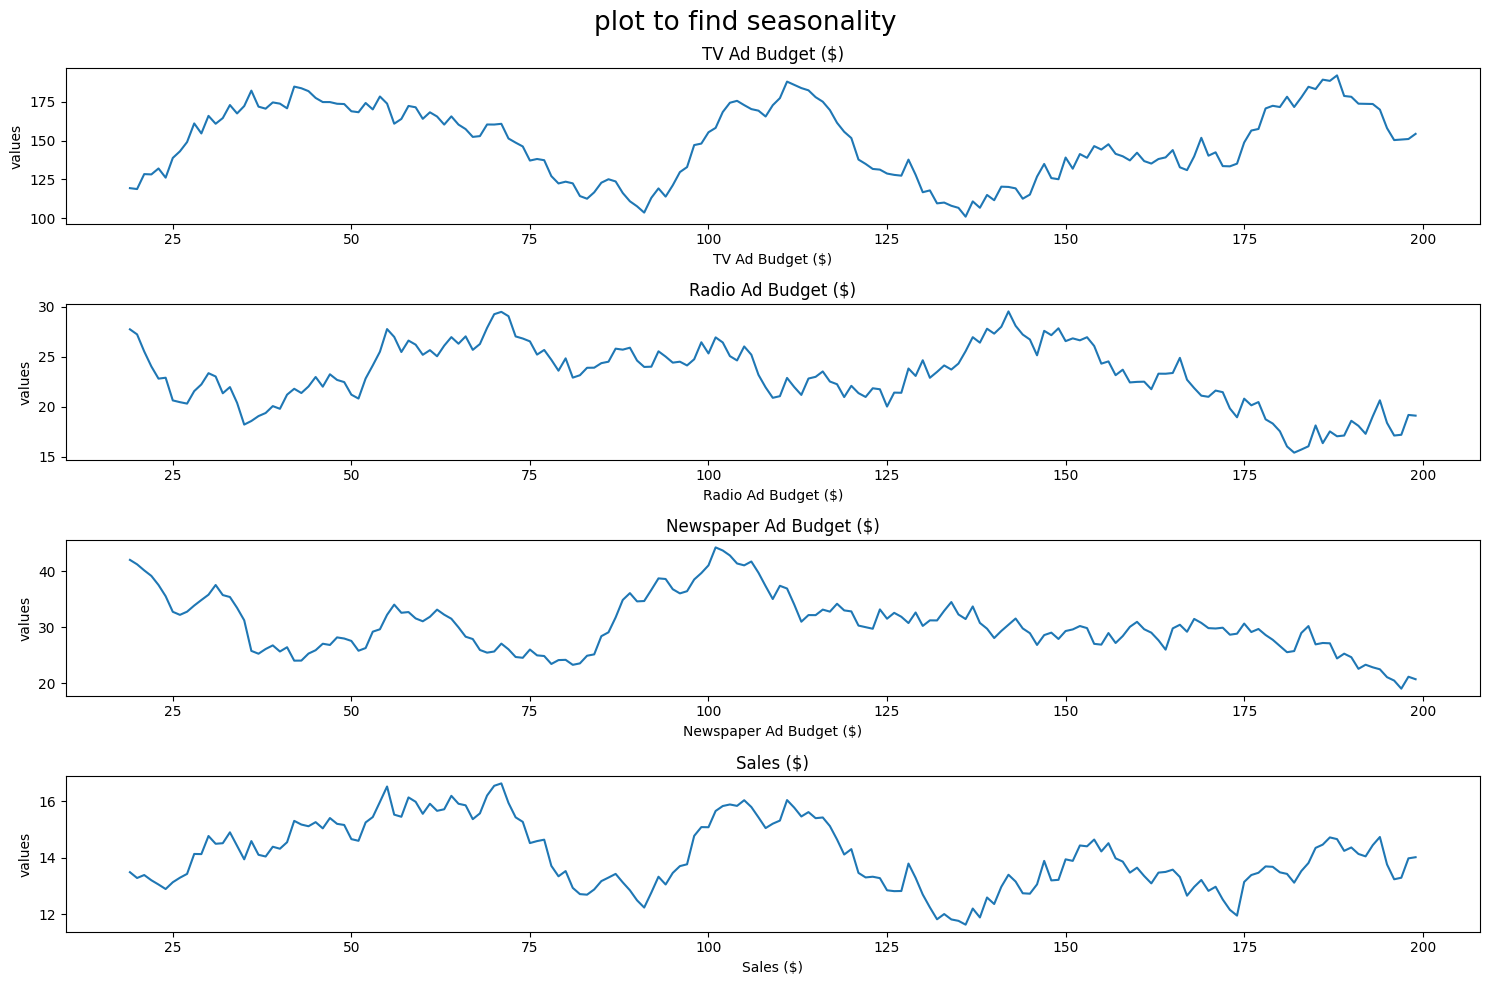

In [687]:
seasonal_plot(20)
#note the  'tv' and 'sales' features sharing a common seasonal pattern/correlation

0.9999999999999999


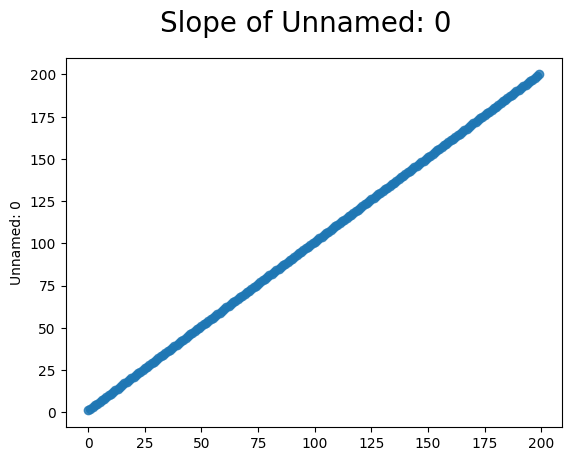

0.026276831920797494


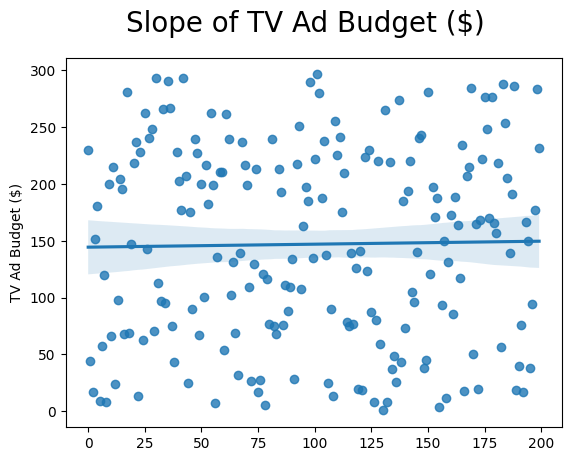

-0.028391059776494518


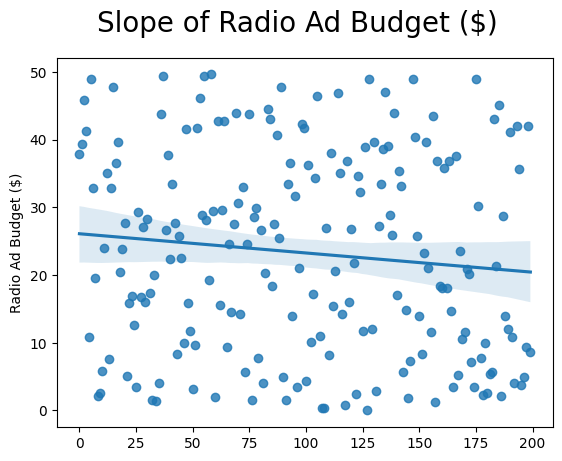

-0.05830195754893886


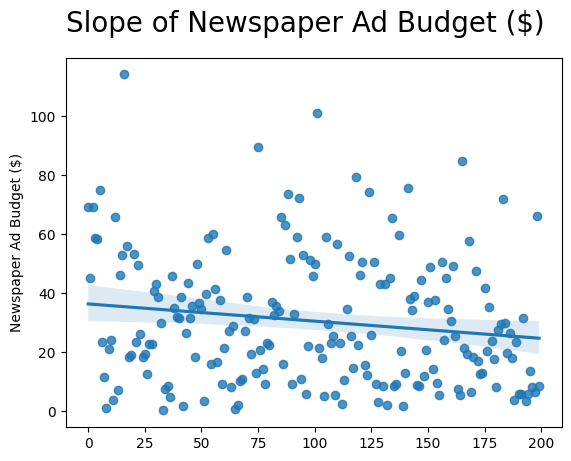

-0.00465289132228307


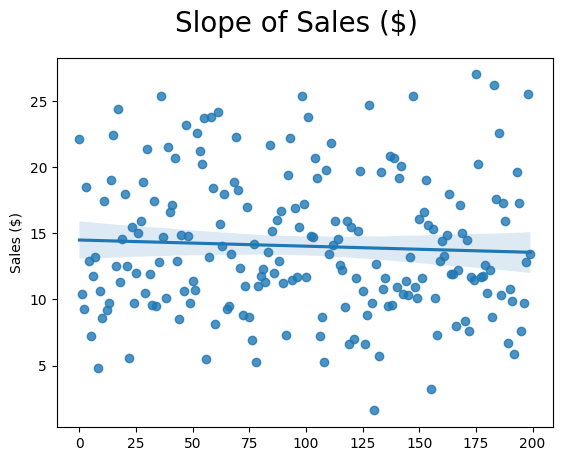

In [28]:
for column in df.columns:
    slope, intercept = np.polyfit(df.index, df[column], 1)
    print(slope)
    sns.regplot(x = df.index,
            y = column, 
            data = df,
            )
    plt.suptitle("Slope of {0}".format(column), fontsize =20 )
    plt.show()

In [42]:
print("ESTIMATIONS DERIVED FROM SLOPE")
print("="*100)

for column in df.columns:
    slope, intercept = np.polyfit(df.index, df[column], 1)
    print(column,":")
    print("Slope= {slope:8.5f}, intercept= {intercept:.5f} ".format(column= column, slope= slope, intercept= intercept))
    print("for each 200 datapoints taken, the change in dollars of {column} is {value:.2f}$, ie {percentage:.2f}%".format(column=column,value=200*slope, percentage= ((200*slope)/df[column].mean())*100 ))
    print("-"*100)

ESTIMATIONS DERIVED FROM SLOPE
Unnamed: 0 :
Slope=  1.00000, intercept= 1.00000 
for each 200 datapoints taken, the change in dollars of Unnamed: 0 is 200.00$, ie 199.00%
----------------------------------------------------------------------------------------------------
TV Ad Budget ($) :
Slope=  0.02628, intercept= 144.42796 
for each 200 datapoints taken, the change in dollars of TV Ad Budget ($) is 5.26$, ie 3.57%
----------------------------------------------------------------------------------------------------
Radio Ad Budget ($) :
Slope= -0.02839, intercept= 26.08891 
for each 200 datapoints taken, the change in dollars of Radio Ad Budget ($) is -5.68$, ie -24.41%
----------------------------------------------------------------------------------------------------
Newspaper Ad Budget ($) :
Slope= -0.05830, intercept= 36.35504 
for each 200 datapoints taken, the change in dollars of Newspaper Ad Budget ($) is -11.66$, ie -38.16%
---------------------------------------------------

### Observations for the question " Are there any trends or patterns in advertisement sales over time? Can you identify any seasonality or cyclicality in the data? " :

* TV budget have clear cyclicality in it, while sales data have a moderate cyclicality. News and radio doesn't have any cyclicality.
* The company is slashing down the already poor budget of of radio and newspaper, a quarter and a third of its budget respectively in a span of 200 datapoints. This is in relation with their correlation.
* TV ads are only getting a 3.5% budget increase, (this is about one-third of the dollars saved from other ad mediums) despite being heavily correlated with sales.
* Company is losing 6% per 200 datapoints.

### Question 3. Are there any outliers or anomalies in the advertisement sales data? How do they impact the overall analysis and predictions?

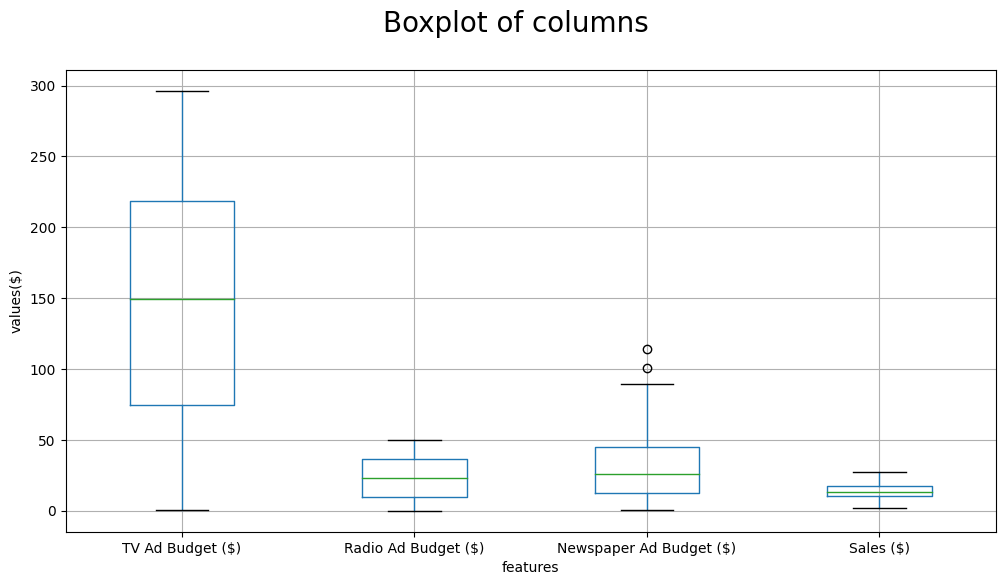

In [44]:
def boxplot(df,title):
    f = plt.figure()
    f.suptitle(title, fontsize=20)
    f.set_figwidth(12)
    f.set_figheight(6)

    df.iloc[: , 1:5].boxplot()
    plt.xlabel('features')
    plt.ylabel('values($)')
    plt.show()
boxplot(df,'Boxplot of columns')

1) Newspaper budget have two outliers at right end and is left-skewed(skewness probably because of single day ads basis)
2) Sales column is slightly left-skewed.
3 Tv budget is humongus compared to the other budgets.
4) sales data is considerably lower than theie ad budgets. Most probably because of scaling down to two or more digits.

Text(0.5, 0.98, 'Columns plotted')

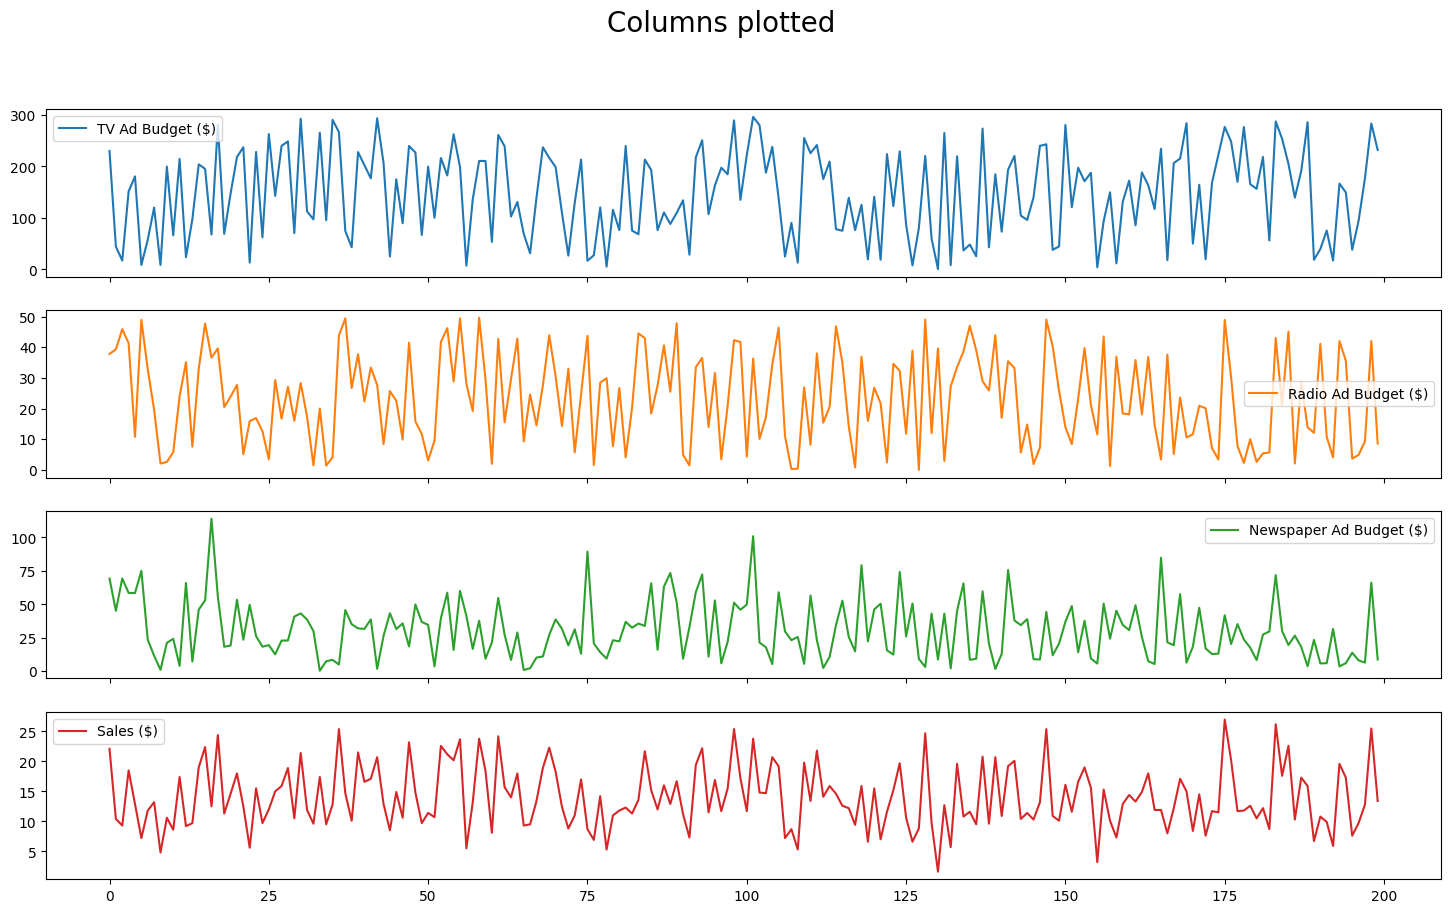

In [48]:
df.iloc[:,1:].plot(
    #kind="barh",
    subplots=True,
    figsize=[18,10])
plt.suptitle("Columns plotted", fontsize= 20)

* Data have extreme fluctuations throughout, per datapoint. This is an anomaly for a budget vs sales data.

In [51]:
print("Effect of 'newspaper' column's outliers over newspaper-sales correlation\n","-"*100)
for i,x in enumerate([0,2,5,10,15]):
    print('correlation with sales after removing top {number:2} largest value of news{outlier:18}='.format(number= x, outlier= '(extreme ouliers)' if (x == 2) else '' ),  df[['Newspaper Ad Budget ($)','Sales ($)']].nlargest(200,'Newspaper Ad Budget ($)', keep="all").tail(200-x).corr().iloc[1,0] )

Effect of 'newspaper' column's outliers over newspaper-sales correlation
 ----------------------------------------------------------------------------------------------------
correlation with sales after removing top  0 largest value of news                  = 0.22829902637616425
correlation with sales after removing top  2 largest value of news(extreme ouliers) = 0.21955467558031153
correlation with sales after removing top  5 largest value of news                  = 0.2509294365608081
correlation with sales after removing top 10 largest value of news                  = 0.24743416994822165
correlation with sales after removing top 15 largest value of news                  = 0.21637674065192697



Both outliers have been positively affecting the sales correlation.

### Question 3.
### //Are there any outliers or anomalies in the advertisement sales data?//

### How do they impact the overall analysis and predictions?

### Observation:

Due to presence of two outliers, we can't use polynomial or other models sensitive to outliers in newspaper column.

## Can you identify any significant changes or shifts in advertisement sales? What factors might have contributed to these changes?

In [700]:
for column in df.columns:
    slope, intercept = np.polyfit(df.index, df[column], 1)
    print("for each 200 datapoints taken, the change in dollars of {column:23s} is {value:7.2f}$, ie, {percentage:6.2f}%".format(column=column,value=200*slope, percentage= ((200*slope)/df[column].mean())*100 ))

for each 200 datapoints taken, the change in dollars of Unnamed: 0              is  200.00$, ie, 199.00%
for each 200 datapoints taken, the change in dollars of TV Ad Budget ($)        is    5.26$, ie,   3.57%
for each 200 datapoints taken, the change in dollars of Radio Ad Budget ($)     is   -5.68$, ie, -24.41%
for each 200 datapoints taken, the change in dollars of Newspaper Ad Budget ($) is  -11.66$, ie, -38.16%
for each 200 datapoints taken, the change in dollars of Sales ($)               is   -0.93$, ie,  -6.64%


### Can you identify any significant changes or shifts in advertisement sales? What factors might have contributed to these changes?

### Observation:

* The company is slashing down the radio and newspaper ad budgets. This might because of their poor effect on their correlation, but can't be sure because they don't have signnifcant budget like TV ads to have considerably affect the public perception.

## Are there any correlations between different advertising channels (e.g., TV, radio, online)? Do certain channels have a stronger impact on sales compared to others?

In [174]:
df.iloc[:,1:5].corr().iloc[:,-1]

TV Ad Budget ($)           0.782224
Radio Ad Budget ($)        0.576223
Newspaper Ad Budget ($)    0.228299
Sales ($)                  1.000000
Name: Sales ($), dtype: float64

In [183]:
df.iloc[:,1:5].corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


In [182]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Observation:
* TV and sales shares a seasonal patterns(correlation). TV also have the clearest seasonal patterns among all the columns.
* TV ads have the best correlation with sales. It also has the most of ad budget.
* Radio ads, despite being 1/5th of the TV budget, have a promisingly high effect on sales when compared on per dollar basis. But this needs to be carefully analysed because radio also have a high correlation to the TV.
* Newspaper ads have the worst correlation with sales per dollar. You can safely say that newspaper ads have the least influence on sales of this product.

## What is the overall trend in advertisement sales? Is it increasing, decreasing, or relatively stable? Can you quantify the growth rate or rate of change?

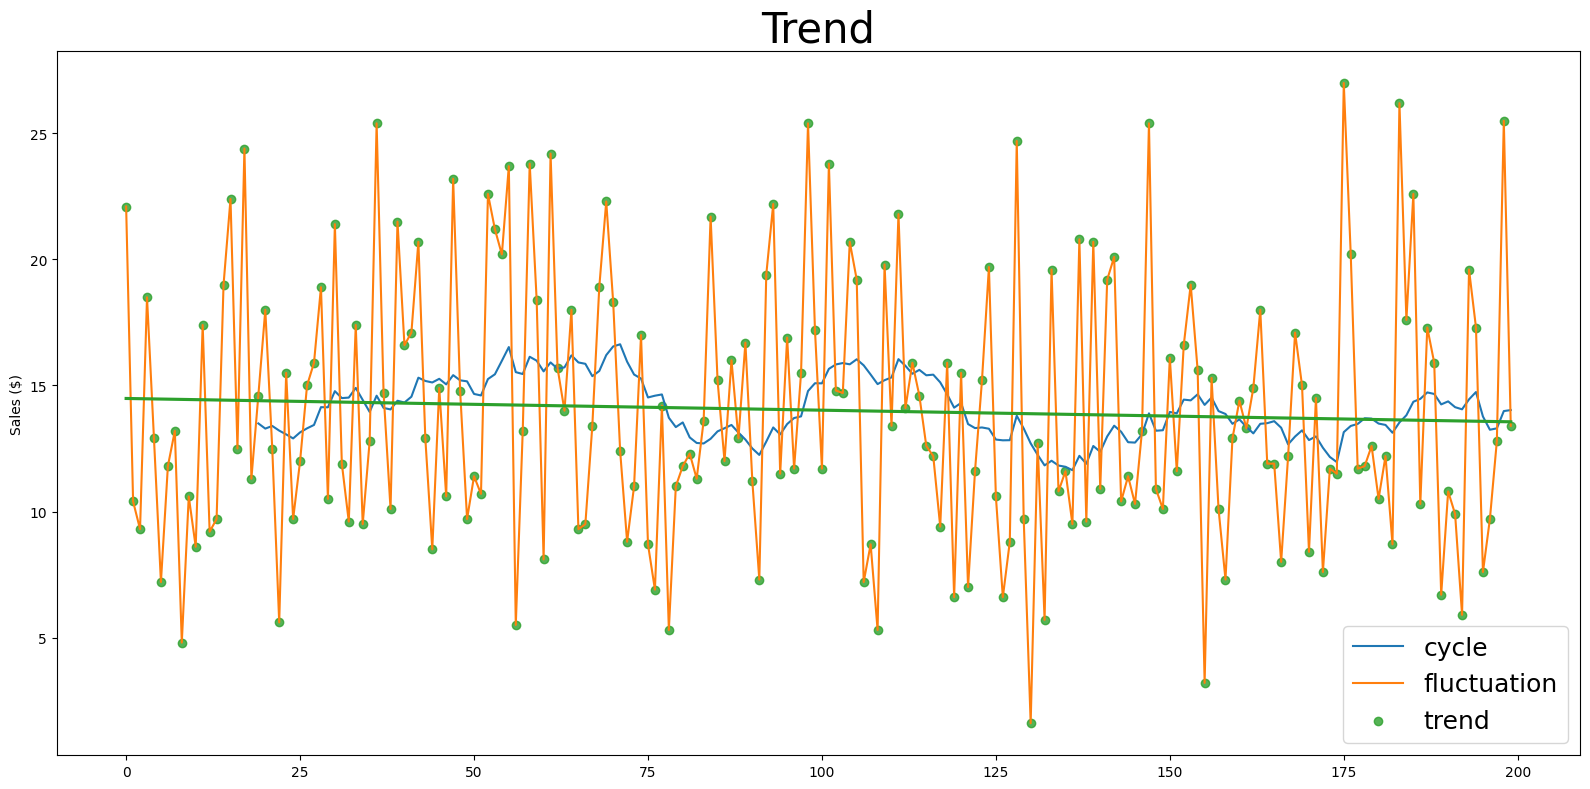

In [185]:
plt.figure(figsize=(16,8))

plt.plot(df['Sales ($)'].rolling(avg_count).mean())
plt.plot(df['Sales ($)'])
sns.regplot(x = df.index,
            y = 'Sales ($)', 
            ci = None,
            data = df)
plt.title("Trend", fontsize = 30)

plt.legend(["cycle", "fluctuation", "trend"],fontsize =18)

plt.tight_layout()
plt.show()

In [161]:
slope, intercept = np.polyfit(df.index, df['Sales ($)'], 1)
slope

-0.00465289132228307

observation: The sales is strongly fluctuating up and down, with seasonal changes, and is in a slight downward direction overall.

This part is answered before in question 2.

## Can you build a predictive model to forecast future advertisement sales based on historical data? Which variables are the most important predictors in the model?

**Importing libraries**

In [624]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#non linear models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#hyperparameter tuning and cross validation
from sklearn.model_selection import GridSearchCV,KFold

#check accuracy
from sklearn.metrics import r2_score

**preprocesssing**

In [655]:
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [656]:
x = df.iloc[:,1:3]
x

,TV Ad Budget ($),Radio Ad Budget ($)
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [657]:
y =df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales ($), Length: 200, dtype: float64

In [665]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [666]:
xscale = StandardScaler().fit(xtrain)
yscale = StandardScaler().fit(np.array(ytrain).reshape(-1,1))#note that the same length array can scale

In [667]:
sytest = yscale.transform(np.array(ytest).reshape(-1, 1))
sxtest = xscale.transform(xtest)
sytrain = yscale.transform(np.array(ytrain).reshape(-1, 1))
sxtrain = xscale.transform(xtrain)

**model selection**

In [669]:
dtree = DecisionTreeRegressor()
lg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gd = GradientBoostingRegressor()

In [670]:
models = [dtree, lg, ridge, lasso, knn, rf, gd]
def model_check(models):
    r2_scores = {}
    print("R2 scores")
    for model_name in models:
        model_name.fit(sxtrain,np.ravel(sytrain))
        ypred = model_name.predict(sxtest)
        score = r2_score(np.ravel(sytest), ypred)
        r2_scores[str(model_name)] = score
    return(r2_scores)
model_check(models)

R2 scores


{'DecisionTreeRegressor()': 0.9687394115908387,
 'LinearRegression()': 0.9059463448699527,
 'Ridge()': 0.9056361469218602,
 'Lasso()': -0.0012253408341325045,
 'KNeighborsRegressor()': 0.9792002191575411,
 'RandomForestRegressor()': 0.9779419169436174,
 'GradientBoostingRegressor()': 0.976394210129728}

**feature selection**

In [681]:
#model1
gb = GradientBoostingRegressor()
gb.fit(sxtrain, np.ravel(sytrain))
y_pred = gb.predict(sxtest)

#model2
gb2 = GradientBoostingRegressor()
gb2.fit(xtrain, ytrain)
y2_pred = gb2.predict(xtest)

In [683]:
print("accuracy with news column included= ",  r2_score(y_pred=y_pred, y_true=np.ravel(sytest)) )
print("accuracy without news column= ", r2_score(y_pred=y2_pred, y_true=ytest) )

accuracy with news column included=  0.9763952719703064
accuracy without news column=  0.9763302053232873


**hyper parameter tuning**

In [ ]:
gb_param = {
        "n_estimators": [1000, 1200,1350,1500,1750,2000,2300,2600,2900,3200,3800],
    "max_leaf_nodes": [10, 20, 50,60,70,80,90, 100],
    "learning_rate": [0.01,0.02,.03,0.04,0.05,.06,.09,.1,.3,],
                }

gb_cv = KFold(n_splits=5)
gd_grid= GridSearchCV(gb , gb_param, cv=gb_cv)
gd_grid.fit(sxtrain, np.ravel(sytrain))
print(gd_grid.best_score_, gd_grid.best_estimator_)

In [674]:
#selected from collab preocessed
gb = GradientBoostingRegressor(learning_rate=0.04, 
                               max_leaf_nodes=70,
                          n_estimators=1350)
gb.fit(sxtrain, np.ravel(sytrain))
y_pred = gb.predict(sxtest)

r2_score(y_pred=y_pred, y_true=np.ravel(sytest))

0.9766013330169999

### question:Can you build a predictive model to forecast future advertisement sales based on historical data? Which variables are the most important predictors in the model?

* Decision trees, particularly ensemble models based on decision trees creates good models for this dataset

* tv and radio is a high predictor of sales.

* news is a poor predictor of sales.



## How accurate is your sales prediction model? Can you evaluate its performance using appropriate metrics such as mean squared error, mean absolute error, or R-squared?

In [675]:
r2_score(y_pred=y_pred, y_true=np.ravel(sytest))

0.9766013330169999

 The gradient boosting regressor model is above 95% accurate.